In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [6]:
df= pd.read_csv('kidney_disease.csv')

In [9]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df['classification'].value_counts()
#here ckd\t is a error value since it appeared twice 

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [13]:
df.shape

(400, 26)

In [15]:
df.drop('id',axis=1,inplace=True)

In [17]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [21]:
df.columns=['age','Blood_pressure','Specefic_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','Bacteria','Blood_glucose_random','Blood_urea','serum_creatinine','sodium','pottasium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','anaemia','classification']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   Blood_pressure           388 non-null    float64
 2   Specefic_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_glucose_random     356 non-null    float64
 10  Blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  pottasium                312 non-null    float64
 14  haemoglobin              3

In [25]:
df['packed_cell_volume']=pd.to_numeric(df['packed_cell_volume'],errors='coerce')
df['white_blood_cell_count']=pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['red_blood_cell_count']=pd.to_numeric(df['red_blood_cell_count'],errors='coerce')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   Blood_pressure           388 non-null    float64
 2   Specefic_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_glucose_random     356 non-null    float64
 10  Blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  pottasium                312 non-null    float64
 14  haemoglobin              3

In [29]:
df.columns

Index(['age', 'Blood_pressure', 'Specefic_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'Bacteria',
       'Blood_glucose_random', 'Blood_urea', 'serum_creatinine', 'sodium',
       'pottasium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anaemia', 'classification'],
      dtype='object')

In [31]:
categorical_cols=[col for col in df.columns if df[col].dtype =='object']
numeric_cols=[col for col in df.columns if df[col].dtype !='object']

In [33]:
categorical_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'Bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anaemia',
 'classification']

In [35]:
numeric_cols

['age',
 'Blood_pressure',
 'Specefic_gravity',
 'albumin',
 'sugar',
 'Blood_glucose_random',
 'Blood_urea',
 'serum_creatinine',
 'sodium',
 'pottasium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [37]:
for col in categorical_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
Bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
anaemia has ['no' 'yes' nan]
classification has ['ckd' 'ckd\t' 'notckd']


In [39]:
df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
df['coronary_artery_disease'].replace(to_replace={'\tno':'no'}, inplace=True)
df['classification'].replace(to_replace={'ckd\t':'ckd'}, inplace=True)

In [41]:
df['classification']=df['classification'].map({'ckd':0,'notckd':1})
df['classification']=pd.to_numeric(df['classification'],errors='coerce')

In [43]:
for col in categorical_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
Bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
anaemia has ['no' 'yes' nan]
classification has [0 1]


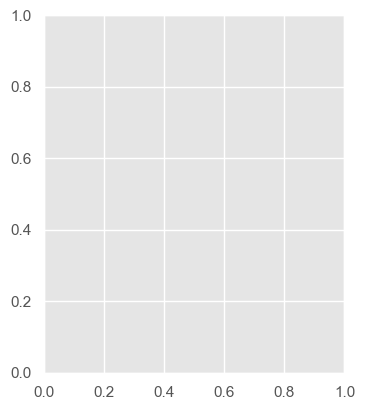

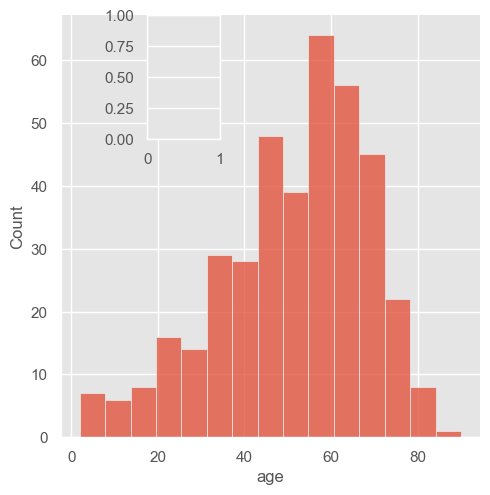

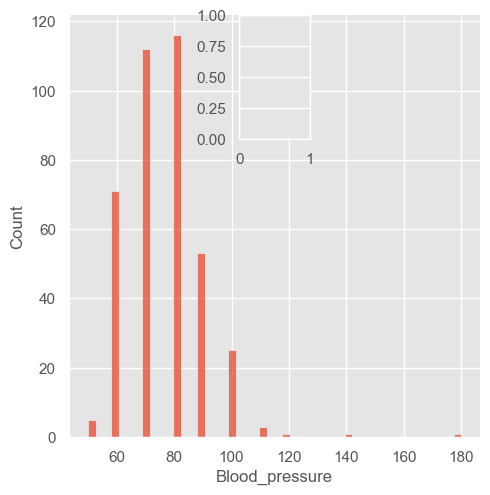

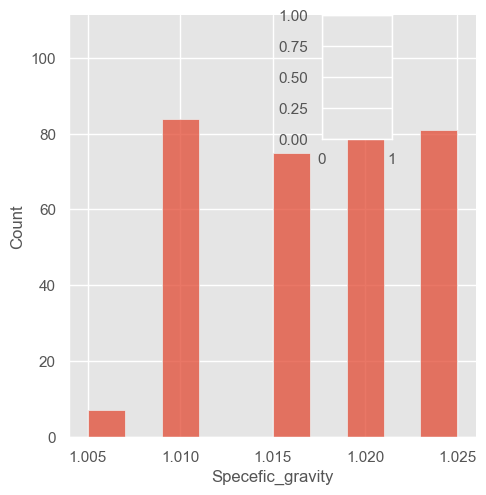

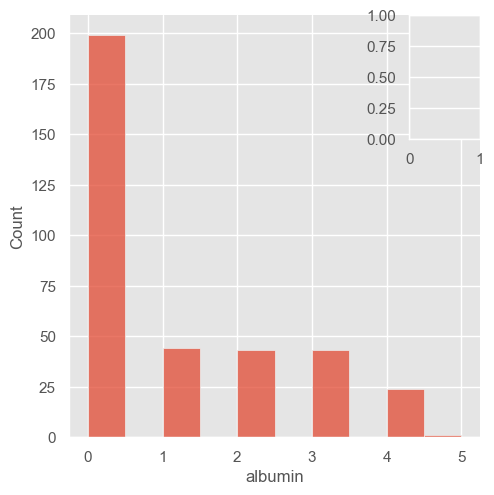

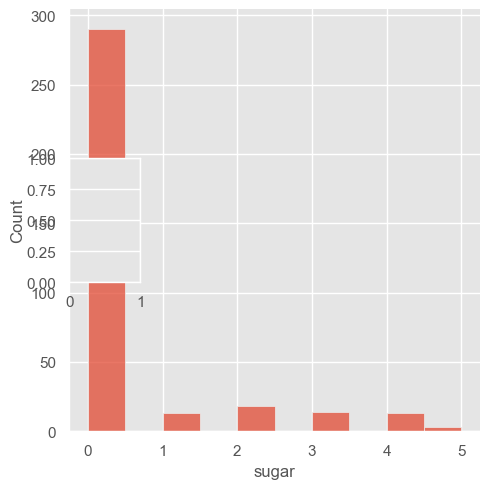

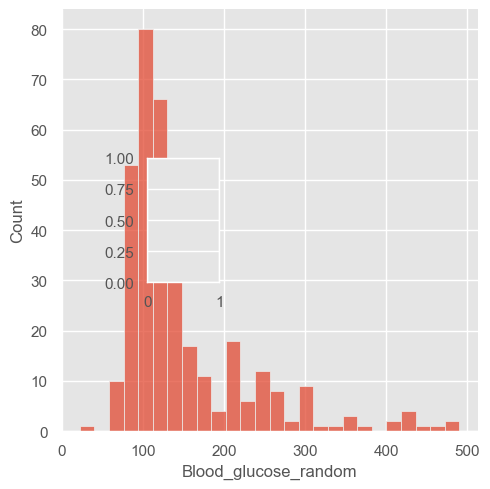

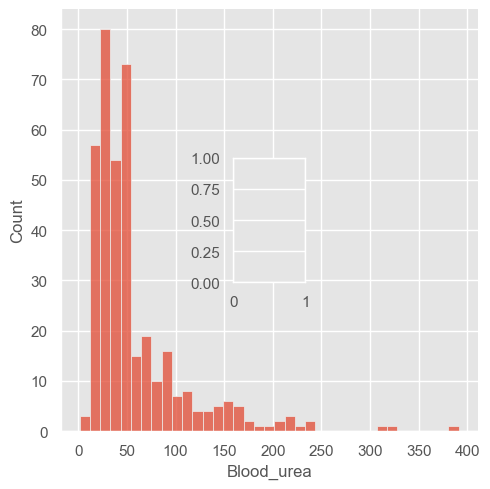

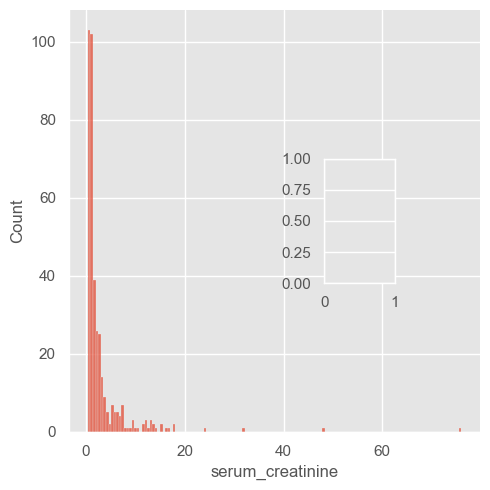

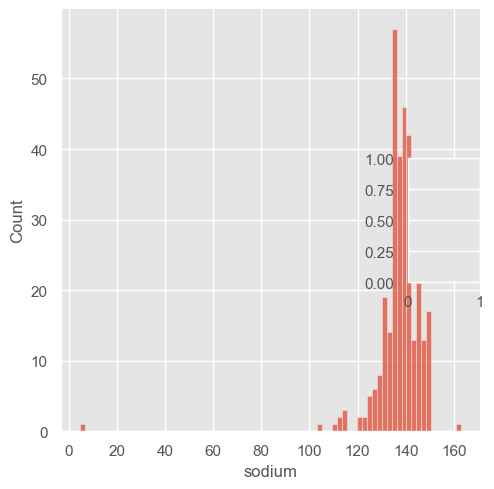

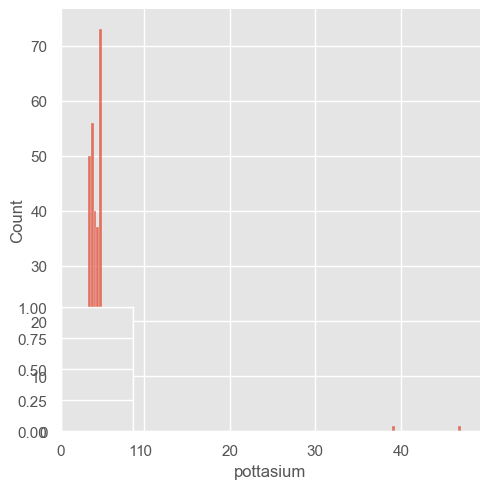

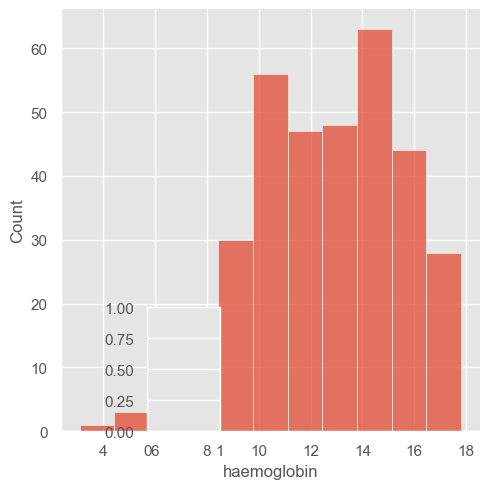

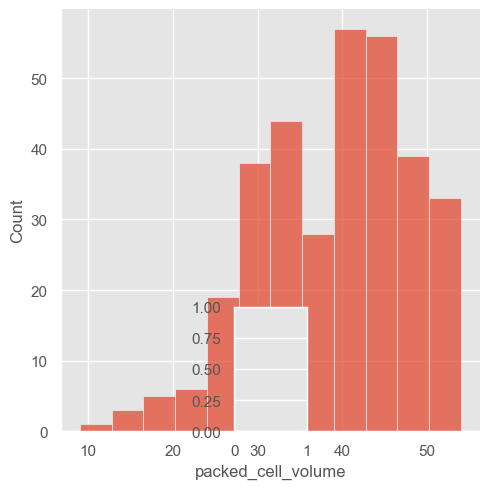

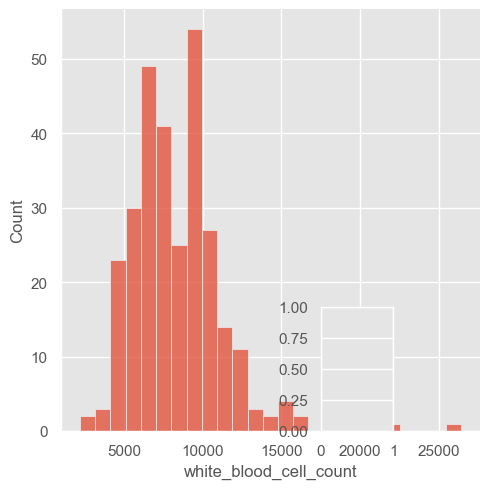

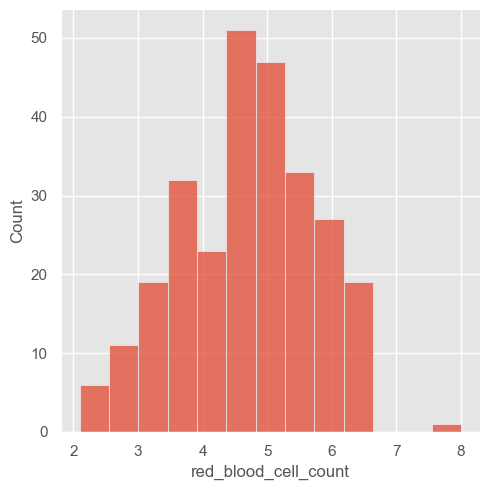

In [45]:
plt.figure(figsize=(20,15))
plotnumber= 1
for column in numeric_cols:
        if plotnumber<=14:
            ax=plt.subplot(3,5,plotnumber)
            sns.displot(df[column])
            plt.xlabel(column)
        plotnumber+=1
plt.tight_layout()
plt.show()

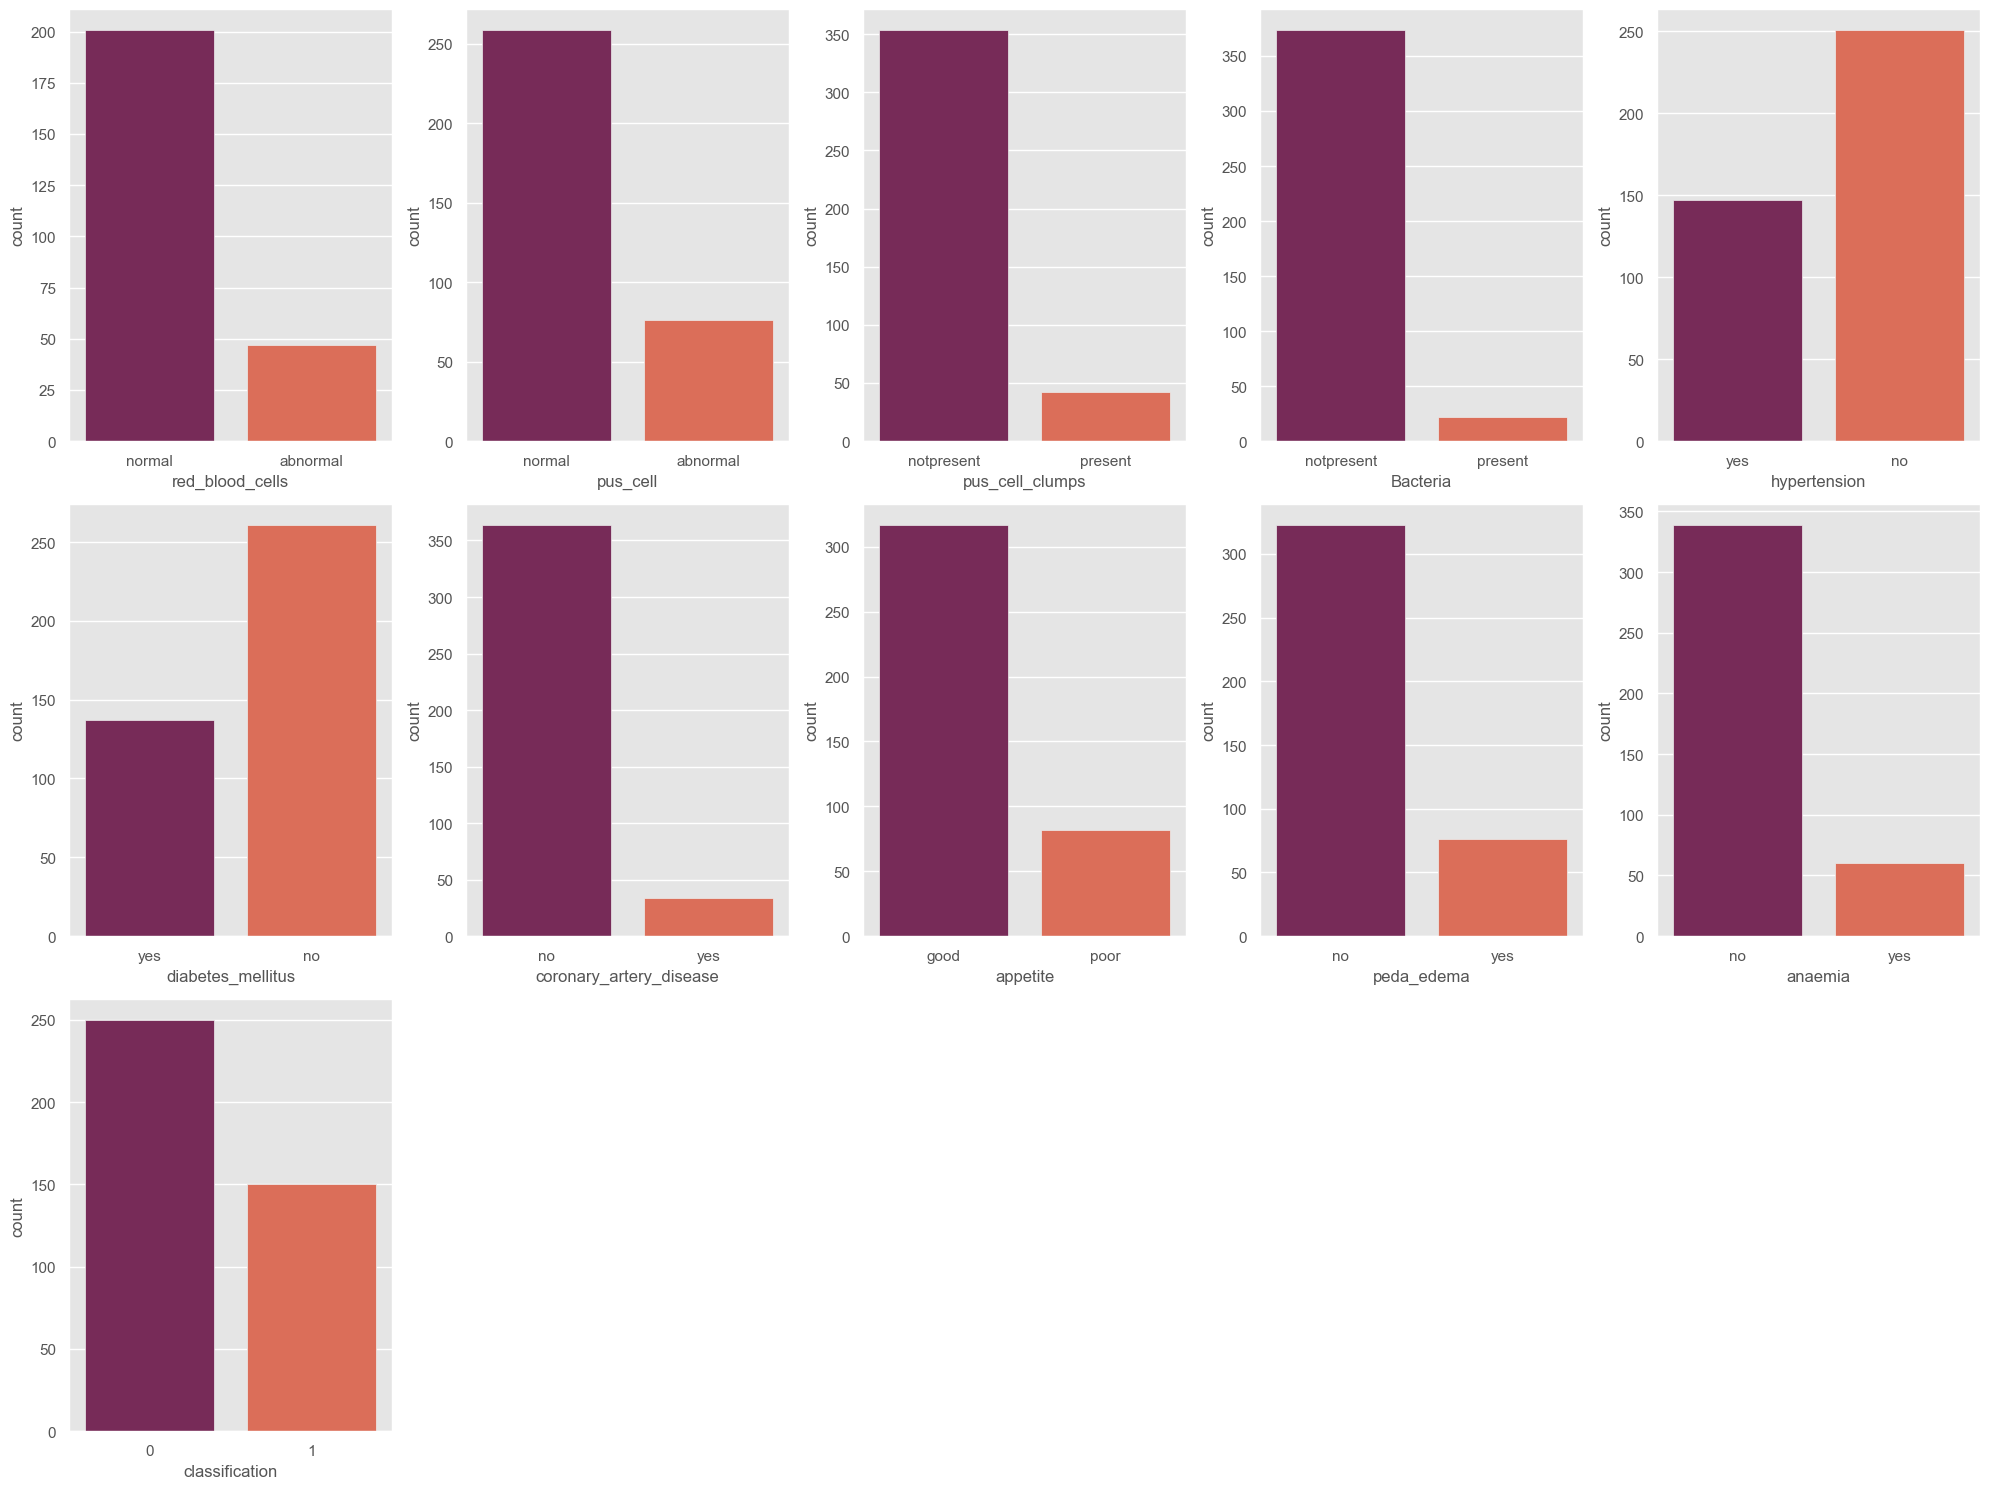

In [71]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in categorical_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(x=column, data=df, palette='rocket') 
        plt.xlabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()


In [78]:
def voilin(col):
    fig = px.violin(df,y=col,x='class',color='class',box=True,template='plotly_dark')
    return fig.show()

def kde(col):
    grid=sns.FacetGrid(df, hue='class',height=6,aspect=2)
    grid.map(sns.kdeplot ,col)
    grid.add_legend()
def scatter_plot(col1,col2):
    fig = px.scatter(df,x=col1,y=col2,color="class",template='plotly_dark')
    return fig.show()

In [82]:
#Data Preprosessing

In [84]:
#cheaking for missing value
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
pottasium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
Specefic_gravity            47
albumin                     46
Blood_glucose_random        44
Blood_urea                  19
serum_creatinine            17
Blood_pressure              12
age                          9
Bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anaemia                      1
classification               0
dtype: int64

In [86]:
#two method
#higher null value=random sampling
#ower= mean mode

In [88]:
def random_sampling(feature):
    random_sample=df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index= df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] = random_sample
    
def inpute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature]= df[feature].fillna(mode)
    

In [90]:
for col in numeric_cols:
    random_sampling(col)

In [92]:
df[numeric_cols].isnull().sum()

age                       0
Blood_pressure            0
Specefic_gravity          0
albumin                   0
sugar                     0
Blood_glucose_random      0
Blood_urea                0
serum_creatinine          0
sodium                    0
pottasium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [96]:
df[categorical_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            4
Bacteria                   4
hypertension               2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   1
peda_edema                 1
anaemia                    1
classification             0
dtype: int64

In [98]:
#feature encoding
for col in categorical_cols:
    print(f"{col} has {df[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
Bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
anaemia has 2
classification has 2


In [100]:
#Label Encoding

In [102]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

In [104]:
df.head()

,age,Blood_pressure,Specefic_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,Bacteria,Blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anaemia,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,97.0,...,38.0,6000.0,4.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [106]:
# MODEL BUILDING

In [108]:
X=df.drop('classification', axis =1)
Y=df['classification']

In [110]:
X

,age,Blood_pressure,Specefic_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,Bacteria,Blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anaemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,97.0,...,11.3,38.0,6000.0,4.7,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.6,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [112]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X ,Y, test_size =0.2,random_state =0)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)


knn_acc = accuracy_score(Y_test , knn.predict(X_test))
print(f"Testing Accuracy of KNN :{accuracy_score(Y_test,knn.predict(X_test))}" )
print(f"Training Accuracy of KNN :{accuracy_score(Y_train,knn.predict(X_train))}" )
 
print(f"Confusion Matrix of KNN :{accuracy_score(Y_test,knn.predict(X_test))}" )
print(f"Classification Report of KNN :{classification_report(Y_test,knn.predict(X_test))}" )

Testing Accuracy of KNN :0.6375
Training Accuracy of KNN :0.80625
Confusion Matrix of KNN :0.6375
Classification Report of KNN :              precision    recall  f1-score   support

           0       0.78      0.62      0.69        52
           1       0.49      0.68      0.57        28

    accuracy                           0.64        80
   macro avg       0.63      0.65      0.63        80
weighted avg       0.68      0.64      0.65        80



In [118]:
# Desision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [122]:
dtc_acc = accuracy_score(Y_test , dtc.predict(X_test))
print(f"Testing Accuracy of DTC :{accuracy_score(Y_test,knn.predict(X_test))}" )
print(f"Training Accuracy of DTC :{accuracy_score(Y_train,knn.predict(X_train))}" )
 
print(f"Confusion Matrix of DTC:\n{accuracy_score(Y_test,knn.predict(X_test))}" )
print(f"Classification Report of DTC :\n{classification_report(Y_test,knn.predict(X_test))}" )

Testing Accuracy of DTC :0.6375
Training Accuracy of DTC :0.80625
Confusion Matrix of DTC:
0.6375
Classification Report of DTC :
              precision    recall  f1-score   support

           0       0.78      0.62      0.69        52
           1       0.49      0.68      0.57        28

    accuracy                           0.64        80
   macro avg       0.63      0.65      0.63        80
weighted avg       0.68      0.64      0.65        80



In [124]:
#Hyper  parameter tuning

In [126]:
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion':['ginni','entropy'],
    'max_depth':[3,5,7,10],
    'splitter' :['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
     'min_samples_split':[1,2,3,5,7],
    'max_features' :['auto','sqrt','log2']
}
grid_search_dtc = GridSearchCV(dtc,GRID_PARAMETER, cv=5, n_jobs=-1,verbose = 1)
grid_search_dtc.fit(X_train,Y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [127]:
#best parameter and beat score 
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
0.978125


In [128]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(Y_test , dtc.predict(X_test))
print(f"Testing Accuracy of DTC :{accuracy_score(Y_test,knn.predict(X_test))}" )
print(f"Training Accuracy of DTC :{accuracy_score(Y_train,knn.predict(X_train))}" )
 
print(f"Confusion Matrix of DTC:\n{confusion_matrix(Y_test,knn.predict(X_test))}" )
print(f"Classification Report of DTC :\n{classification_report(Y_test,knn.predict(X_test))}" )

Testing Accuracy of DTC :0.6375
Training Accuracy of DTC :0.80625
Confusion Matrix of DTC:
[[32 20]
 [ 9 19]]
Classification Report of DTC :
              precision    recall  f1-score   support

           0       0.78      0.62      0.69        52
           1       0.49      0.68      0.57        28

    accuracy                           0.64        80
   macro avg       0.63      0.65      0.63        80
weighted avg       0.68      0.64      0.65        80



In [129]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini',max_depth = 10, max_features ="sqrt",min_samples_leaf= 1, min_samples_split= 7 , n_estimators = 400)
rand_clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [130]:
rand_clf_acc = accuracy_score(Y_test , rand_clf.predict(X_test))
print(f"Testing Accuracy of Random Forest:{accuracy_score(Y_test,rand_clf.predict(X_test))}" )
print(f"Training Accuracy of Random Forest :{accuracy_score(Y_train,rand_clf.predict(X_train))}" )
 
print(f"Confusion Matrix of Random Forest:\n{confusion_matrix(Y_test,rand_clf.predict(X_test))}" )
print(f"Classification Report of Random Forest :\n{classification_report(Y_test,rand_clf.predict(X_test))}" )

Testing Accuracy of Random Forest:0.975
Training Accuracy of Random Forest :0.99375
Confusion Matrix of Random Forest:
[[52  0]
 [ 2 26]]
Classification Report of Random Forest :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [131]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 4.3 MB/s eta 0:00:35
   ---------------------------------------- 0.4/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 0.6/150.0 MB 5.3 MB/s eta 0:00:29
   ---------------------------------------- 0.7/150.0 MB 5.7 MB/s eta 0:00:27
   ---------------------------------------- 0.7/150.0 MB 5.7 MB/s eta 0:00:27
   ---------------------------------------- 0.9/150.0 MB 3.6 MB/s eta 0:00:42
   ---------------------------------------- 1.0/150.0 MB 3.7 MB/s eta 0:00:41
   ---------------------------------------- 1.6/150.0 MB 4.9 MB/s eta 0:00:31
   ---------------------------------------- 1.6/150.0 MB 4.9 MB/s eta 0:00:31
    --------------------------------------- 2.2/150.0 MB 5.2 MB/s eta 0:00:29
    --------------------------------------- 2.7/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 3.1/150.0 MB 6.3 MB/s eta 0

In [132]:
from xgboost import XGBClassifier


In [133]:
xgb = XGBClassifier(objective="binary:logistic", learning_rate=0.001, max_depth=10, n_estimators=100)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [134]:
xgb_acc = accuracy_score(Y_test , xgb.predict(X_test))
print(f"Testing Accuracy of XGB :{accuracy_score(Y_test,xgb.predict(X_test))}" )
print(f"Training Accuracy of XGB :{accuracy_score(Y_train,xgb.predict(X_train))}" )
 
print(f"Confusion Matrix of XGB:\n{confusion_matrix(Y_test,xgb.predict(X_test))}" )
print(f"Classification Report of XGB :\n{classification_report(Y_test,xgb.predict(X_test))}" )

Testing Accuracy of XGB :0.65
Training Accuracy of XGB :0.61875
Confusion Matrix of XGB:
[[52  0]
 [28  0]]
Classification Report of XGB :
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [135]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [136]:
lr_acc = accuracy_score(Y_test , lr.predict(X_test))
print(f"Testing Accuracy of LR :{accuracy_score(Y_test,lr.predict(X_test))}" )
print(f"Training Accuracy of LR:{accuracy_score(Y_train,lr.predict(X_train))}" )
 
print(f"Confusion Matrix of LR:\n{confusion_matrix(Y_test,lr.predict(X_test))}" )
print(f"Classification Report of LR :\n{classification_report(Y_test,lr.predict(X_test))}" )

Testing Accuracy of LR :0.9125
Training Accuracy of LR:0.9125
Confusion Matrix of LR:
[[47  5]
 [ 2 26]]
Classification Report of LR :
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [137]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC(probability=True)

parameter = {
    'gamma':[0.0001 , 0.001 , 0.01 , 0.1],
    'C':[0.01,0.05,0.5,0.1,1,10,15,20]
}

grid_search = GridSearchCV(svm,parameter)
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [138]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.0001}
0.740625


In [139]:
svm =SVC(gamma = 0.0001,C =15, probability=True)
svm.fit(X_train , Y_train)

SVC(C=15, gamma=0.0001, probability=True)

In [142]:
svm_acc = accuracy_score(Y_test , svm.predict(X_test))
print(f"Testing Accuracy of SVC:{accuracy_score(Y_test,svm.predict(X_test))}" )
print(f"Training Accuracy of SVC:{accuracy_score(Y_train,svm.predict(X_train))}" )
 
print(f"Confusion Matrix of SVC:\n{confusion_matrix(Y_test,svm.predict(X_test))}" )
print(f"Classification Report of SVC :\n{classification_report(Y_test,svm.predict(X_test))}" )

Testing Accuracy of SVC:0.8125
Training Accuracy of SVC:0.98125
Confusion Matrix of SVC:
[[43  9]
 [ 6 22]]
Classification Report of SVC :
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        52
           1       0.71      0.79      0.75        28

    accuracy                           0.81        80
   macro avg       0.79      0.81      0.80        80
weighted avg       0.82      0.81      0.81        80



In [144]:
#Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
PARAMETERS ={
    'loss':['deviance', 'exponential'],
    'learning_rate':[0.001 , 0.1 ,1,10],
    'n_estimators':[100,150,180,200]
}
grid_search_gbc =GridSearchCV(gbc,PARAMETERS , cv=5, n_jobs=-1,verbose=1)
grid_search_gbc.fit(X_train , Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [148]:
print(grid_search_gbc.best_params_)

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 150}


In [149]:
print(grid_search_gbc.best_score_)

0.975


In [174]:
gbc = GradientBoostingClassifier(learning_rate=1,loss='deviance',n_estimators=100)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=1, loss='deviance')

In [175]:
gbc_acc = accuracy_score(Y_test , gbc.predict(X_test))
print(f"Testing Accuracy of GBC:{accuracy_score(Y_test,gbc.predict(X_test))}" )
print(f"Training Accuracy of GBC:{accuracy_score(Y_train,gbc.predict(X_train))}" )
 
print(f"Confusion Matrix of GBC:\n{confusion_matrix(Y_test,gbc.predict(X_test))}" )
print(f"Classification Report of GBC :\n{classification_report(Y_test,gbc.predict(X_test))}" )

Testing Accuracy of GBC:0.9875
Training Accuracy of GBC:1.0
Confusion Matrix of GBC:
[[52  0]
 [ 1 27]]
Classification Report of GBC :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [178]:
#Model comparision 
models = pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVM','DT','Random Forest Classifier','XgBoost','Gradient Boosting'],
    'score':[lr_acc, knn_acc, svm_acc, dtc_acc, rand_clf_acc, xgb_acc, gbc_acc]
    })
models.sort_values(by='score', ascending = False)

,Model,score
6,Gradient Boosting,0.9875
4,Random Forest Classifier,0.9750
3,DT,0.9500
0,Logistic Regression,0.9125
2,SVM,0.8125
5,XgBoost,0.6500
1,KNN,0.6375


In [180]:
import pickle 
model = dtc
pickle.dump(model, open("Kidney.pkl",'wb'))

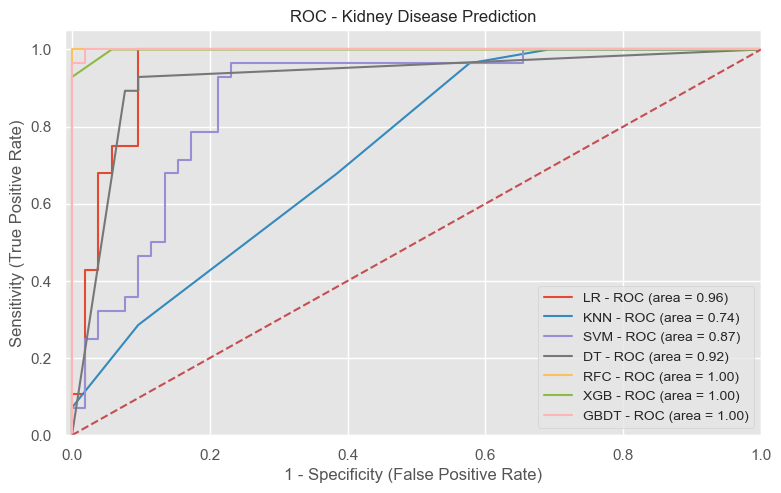

In [182]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
models = [
    {'label':'LR', 'model':lr},
    {'label':'KNN', 'model':knn},
    {'label':'SVM', 'model':svm},
    {'label':'DT', 'model':dtc},
    {'label':'RFC', 'model':rand_clf},
    {'label':'XGB', 'model':xgb},
    {'label':'GBDT', 'model':gbc}
]

for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0,1],[0,1],'r--')    
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show() 


In [183]:
pip install nbconvert[webpdf]


   ---------------------------------------- 0.0/34.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/34.9 MB 4.8 MB/s eta 0:00:08
   ---------------------------------------- 0.2/34.9 MB 2.5 MB/s eta 0:00:15
   ---------------------------------------- 0.3/34.9 MB 3.1 MB/s eta 0:00:12
    --------------------------------------- 0.6/34.9 MB 3.8 MB/s eta 0:00:09
   - -------------------------------------- 1.0/34.9 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.7/34.9 MB 7.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.2/34.9 MB 7.7 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/34.9 MB 8.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/34.9 MB 7.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.8/34.9 MB 7.2 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/34.9 MB 7.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/34.9 MB 7.1 MB/s eta 0:00:05
   ---

In [185]:
!pip install shap


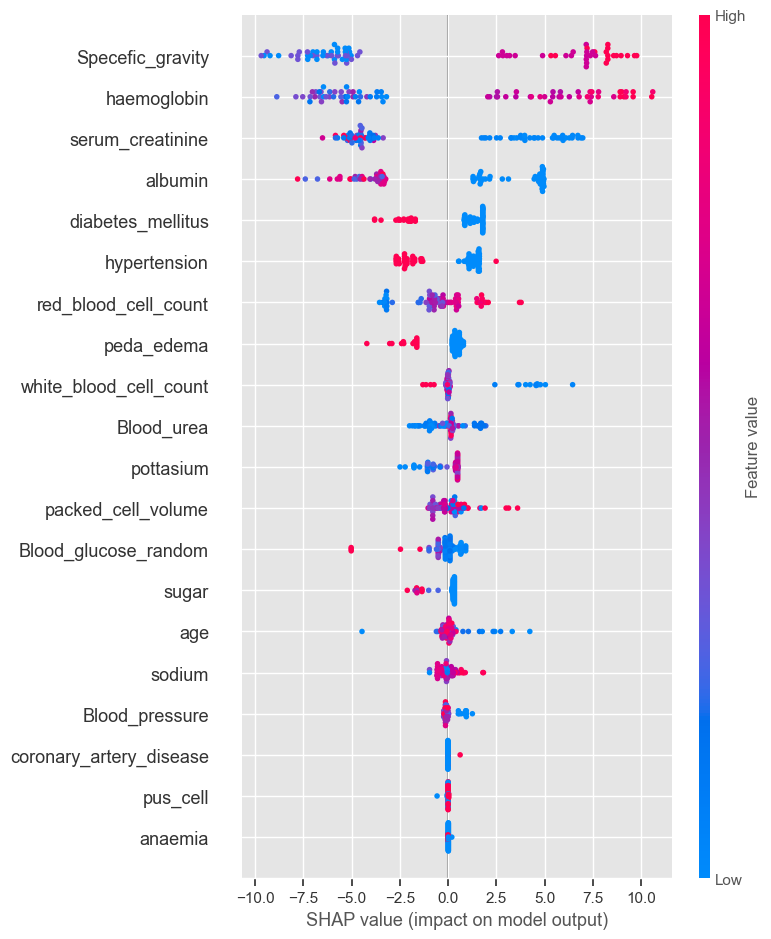

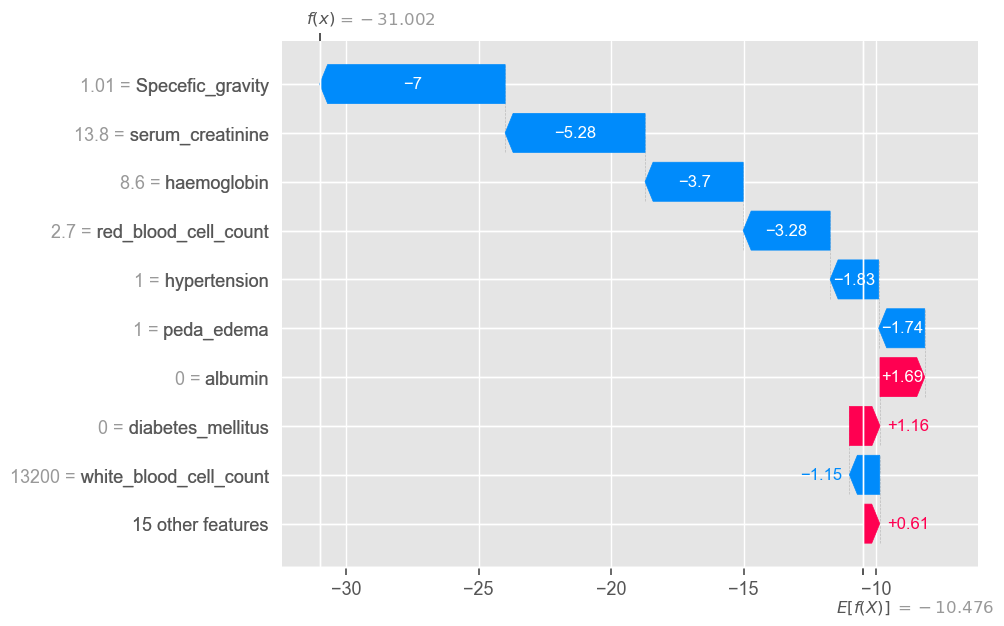

In [186]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.plots.waterfall(shap_values[0])


In [190]:
!pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -------------- ----------------------- 102.4/275.7 kB 2.9 MB/s eta 0:00:01
     -------------------------------- ----- 235.5/275.7 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=30017e342d099962326026a1ead475d5f0aba2b503528e9ea8fdf6f3fb5a1b10
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [196]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['No Disease', 'Disease'], mode='classification')
i = 10  # any instance index
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)